In [121]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2 as cv
from skimage.data import page

# img1 = Image.open('04.Segmentação/Image_(1).jpg')
# img1a = Image.open('04.Segmentação/Image_(1a).jpg')
# img2a = Image.open('04.Segmentação/Image_(2a).jpg')
# print("Imagem_(1) =", img1.size, img1.mode, img1.format)
# print("Imagem_(1a) =", img1a.size, img1a.mode, img1a.format)
# print("Imagem_(2a) =", img2a.size, img2a.mode, img2a.format)

img1 = cv.imread('04.Segmentação/Image_(1).jpg')
img1a = cv.imread('04.Segmentação/Image_(1a).jpg')
img2a = cv.imread('04.Segmentação/Image_(2a).jpg')
gauss = cv.imread('04.Segmentação/gauss.png')
bilateral = cv.imread('04.Segmentação/bilateral.png')
img3a = cv.imread('04.Segmentação/Image_(3a).jpg')
img3b = cv.imread('04.Segmentação/Image_(3b).jpg')
img4 = cv.imread('04.Segmentação/Image_(4).jpg')
img5 = cv.imread('04.Segmentação/Image_(5).jpg')

In [53]:
# Canny is the method we are calling to do edge detection using OpenCV.
# Image is a parameter of the function.
# 100 and 200 are the lower and upper thresholds.
def plot(image, edge):
    plt.subplot(121),plt.imshow(image), 
    plt.title('Original')

    plt.subplot(122),plt.imshow(edge, cmap = 'gray'), 
    plt.title('Edge')

    plt.show()
# Location array is needed for the plotting part.
# And then, we are visualization both the original image and the edge detected image.
# The cmap parameter is used to change the color of the images. In our case, we are converting them to gray.


## Imagem_(1)

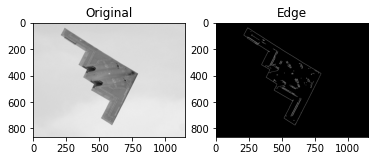

True

In [56]:
edge1 = cv.Canny(img1, 100, 200) 
plot(img1, edge1)
cv.imwrite('04.Segmentação/results/New_Image_(1)_edge.jpg', edge1)

## Imagem_(1a) | Without filter

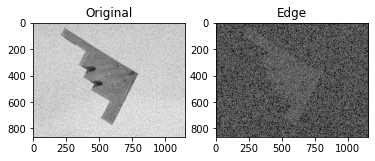

True

In [57]:
edge1a = cv.Canny(img1a, 100, 200) 
plot(img1a, edge1a)
cv.imwrite('04.Segmentação/results/New_Image_(1a)_edge.jpg', edge1a)

## Imagem_(1a)

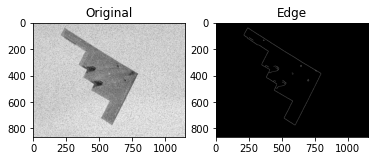

True

In [71]:
# A ideia principal do filtro mediano é percorrer o sinal entrada por entrada, substituindo cada entrada pela mediana das entradas vizinhas. 
# O padrão de vizinhos é chamado de "janela", que desliza, entrada por entrada.
new_img1a = cv.medianBlur(img1a, 7) # tamanho linear da abertura; deve ser ímpar e maior que 1, por exemplo: 3, 5, 7 ...

edge1a = cv.Canny(new_img1a, 100, 200) 
plot(img1a, edge1a)
cv.imwrite('04.Segmentação/results/New_Image_(1a)_edge.jpg', edge1a)

## Imagem_(2a)

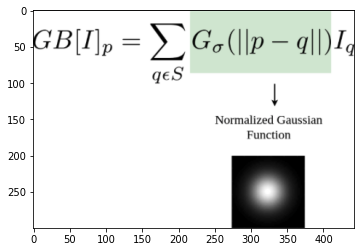

In [101]:
# A função gaussiana do espaço garante que apenas pixels que são 'vizinhos espaciais' são considerados para filtragem
plt.imshow(gauss)

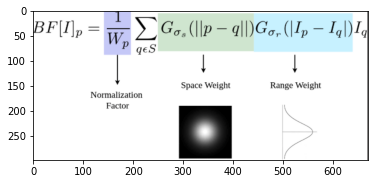

In [100]:
# O fator de normalização e o peso da faixa são novos termos adicionados à equação anterior
plt.imshow(bilateral)

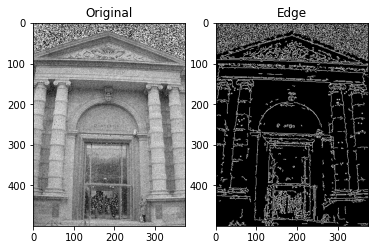

True

In [110]:
# Enquanto o componente gaussiano aplicado no domínio da intensidade (uma função gaussiana de diferenças de intensidade) 
# garante que apenas os pixels com intensidades semelhantes às do pixel central ("vizinhos de intensidade") sejam incluídos para calcular 
# o valor de intensidade desfocado.
new_img2a = cv.bilateralFilter(img2a, 7, 95, 95) # quanto maior o valor, os pixels mais distantes vão começar a ser considerados.

edge2a = cv.Canny(new_img2a, 100, 200) 
plot(img2a, edge2a)
cv.imwrite('04.Segmentação/results/New_Image_(2a)_edge.jpg', edge2a)

## Image_(3a)

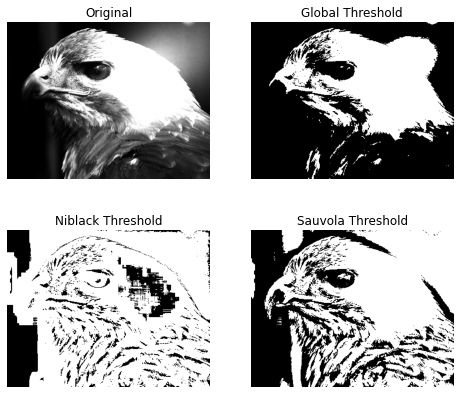

In [118]:
# UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (310, 401, 3) looks like an RGB image

from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)
from skimage.color import rgb2gray

image3a = rgb2gray(img3a)

binary_global = image3a > threshold_otsu(image3a)

window_size = 25
thresh_niblack = threshold_niblack(image3a, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image3a, window_size=window_size)

binary_niblack = image3a > thresh_niblack
binary_sauvola = image3a > thresh_sauvola

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(image3a, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')
save = Image.fromarray(image3a).convert("L")
save = save.save("04.Segmentação/results/Original_Image_(3a).jpg", quality=95)

plt.subplot(2, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')
save = Image.fromarray(binary_global).convert("L")
save = save.save("04.Segmentação/results/Global_Image_(3a).jpg", quality=95)

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')
save = Image.fromarray(binary_niblack).convert("L")
save = save.save("04.Segmentação/results/Niblack_Image_(3a).jpg", quality=95)

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')
save = Image.fromarray(binary_sauvola).convert("L")
save = save.save("04.Segmentação/results/Sauvola_Image_(3a).jpg", quality=95)

plt.show()

## Image_(3b)

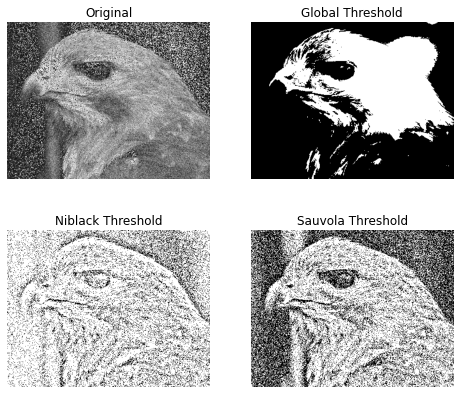

In [120]:
image3b = rgb2gray(img3b)

binary_global = image3a > threshold_otsu(image3a)

window_size = 25
thresh_niblack = threshold_niblack(image3b, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image3b, window_size=window_size)

binary_niblack = image3b > thresh_niblack
binary_sauvola = image3b > thresh_sauvola

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(image3b, cmap = plt.cm.gray)
plt.title('Original')
plt.axis('off')
save = Image.fromarray(image3a).convert("L")
save = save.save("04.Segmentação/results/Original_Image_(3b).jpg", quality=95)

plt.subplot(2, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')
save = Image.fromarray(binary_global).convert("L")
save = save.save("04.Segmentação/results/Global_Image_(3b).jpg", quality=95)

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')
save = Image.fromarray(binary_niblack).convert("L")
save = save.save("04.Segmentação/results/Niblack_Image_(3b).jpg", quality=95)

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')
save = Image.fromarray(binary_sauvola).convert("L")
save = save.save("04.Segmentação/results/Sauvola_Image_(3b).jpg", quality=95)

plt.show()

## Image_(4)

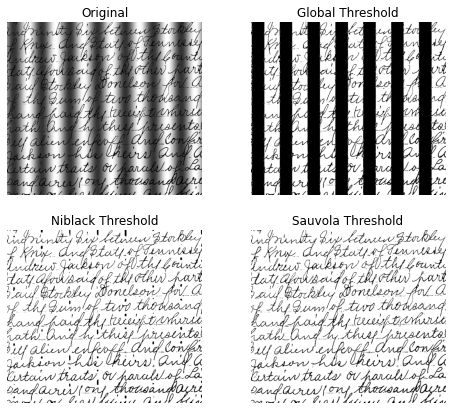

In [124]:
image4 = rgb2gray(img4)

binary_global = image4 > threshold_otsu(image4)

window_size = 25
thresh_niblack = threshold_niblack(image4, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image4, window_size=window_size)

binary_niblack = image4 > thresh_niblack
binary_sauvola = image4 > thresh_sauvola

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(image4, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')
save = Image.fromarray(image4).convert("L")
save = save.save("04.Segmentação/results/Original_Image_(4).jpg", quality=95)

plt.subplot(2, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')
save = Image.fromarray(binary_global).convert("L")
save = save.save("04.Segmentação/results/Global_Image_(4).jpg", quality=95)

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')
save = Image.fromarray(binary_niblack).convert("L")
save = save.save("04.Segmentação/results/Niblack_Image_(4).jpg", quality=95)

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')
save = Image.fromarray(binary_sauvola).convert("L")
save = save.save("04.Segmentação/results/Sauvola_Image_(4).jpg", quality=95)

plt.show()

## Image_(5)

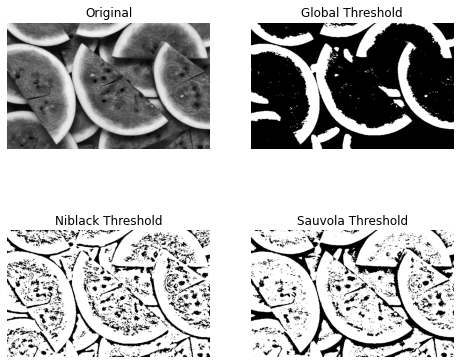

In [125]:
image5 = rgb2gray(img5)

binary_global = image5 > threshold_otsu(image5)

window_size = 25
thresh_niblack = threshold_niblack(image5, window_size=window_size, k=0.6)
thresh_sauvola = threshold_sauvola(image5, window_size=window_size)

binary_niblack = image5 > thresh_niblack
binary_sauvola = image5 > thresh_sauvola

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(image5, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')
save = Image.fromarray(image5).convert("L")
save = save.save("04.Segmentação/results/Original_Image_(5).jpg", quality=95)

plt.subplot(2, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')
save = Image.fromarray(binary_global).convert("L")
save = save.save("04.Segmentação/results/Global_Image_(5).jpg", quality=95)

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')
save = Image.fromarray(binary_niblack).convert("L")
save = save.save("04.Segmentação/results/Niblack_Image_(5).jpg", quality=95)

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')
save = Image.fromarray(binary_sauvola).convert("L")
save = save.save("04.Segmentação/results/Sauvola_Image_(5).jpg", quality=95)

## Histogramas

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [12]:
def getMinMax(arr):
    # return [min(arr), max(arr)]
    return [0, 255]


def histogram(arr):
    h_arr = np.zeros(256)
    g_arr = ["" for x in range(256)]


    for x in range(len(arr)):
        h_arr[arr[x]] += 1


    max_arr = max(h_arr)
    for x in range(len(h_arr)):
        g_arr[x] = (str(x) + "\t: " + str("|" * int((h_arr[x] * 100)/int(max_arr)) + "\n"))


    return [h_arr, g_arr, getMinMax(arr)]


def printHistogramTxt(save_path, g_arr, p_min_max):
    with open((save_path.split(".")[0] + "_histogram.txt"), "w") as text_file:
        text_file.write("Histograma da imagem: " + save_path + "\n\n")
        for x in range(len(g_arr)):
            text_file.write(g_arr[x])


def printHistogramGraph(save_path, h_arr):
    plt.bar([x for x in range(256)], h_arr)
    plt.title("Histograma")
    plt.xlabel("Pixel")
    plt.ylabel("Frequência")
    plt.grid(True)
    plt.savefig(save_path.split(".")[0] + "_histogram.jpg")
    plt.clf()

## Original

In [17]:
img1= Image.open("04.Segmentação/bilateral.png")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/bilateral.png",h_arr)

<Figure size 432x288 with 0 Axes>

In [18]:
img1= Image.open("04.Segmentação/gauss.png")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/gauss.png",h_arr)

<Figure size 432x288 with 0 Axes>

In [19]:
img1= Image.open("04.Segmentação/Image_(1).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/Image_(1).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [20]:
img1= Image.open("04.Segmentação/Image_(1a).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/Image_(1a).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [21]:
img1= Image.open("04.Segmentação/Image_(2a).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/Image_(2a).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [22]:
img1= Image.open("04.Segmentação/Image_(3a).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/Image_(3a).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [23]:
img1= Image.open("04.Segmentação/Image_(3b).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/Image_(3b).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [24]:
img1= Image.open("04.Segmentação/Image_(4).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/Image_(4).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [25]:
img1= Image.open("04.Segmentação/Image_(5).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/Image_(5).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

## result

In [26]:
img1= Image.open("04.Segmentaçãoresults/Global_Image_(3a).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentaçãoresults/Global_Image_(3a).jpg",h_arr)

FileNotFoundError: [Errno 2] No such file or directory: '04Segmentaçãoresults/Global_Image_(3a).jpg'

In [ ]:
img1= Image.open("04.Segmentação/results/Global_Image_(3b).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Global_Image_(3b).jpg",h_arr)

In [ ]:
img1= Image.open("04.Segmentação/results/Global_Image_(4).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Global_Image_(4).jpg",h_arr)

In [27]:
img1= Image.open("04.Segmentação/results/Global_Image_(5).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Global_Image_(5).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [28]:
img1= Image.open("04.Segmentação/results/New_Image_(1)_edge.jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/New_Image_(1)_edge.jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [29]:
img1= Image.open("04.Segmentação/results/New_Image_(1a)_edge.jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/New_Image_(1a)_edge.jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [33]:
img1= Image.open("04.Segmentação/results/New_Image_(2a)_edge.jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/New_Image_(2a)_edge.jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [34]:
img1= Image.open("04.Segmentação/results/Niblack_Image_(3a).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Niblack_Image_(3a).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [35]:
img1= Image.open("04.Segmentação/results/Niblack_Image_(3b).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Niblack_Image_(3b).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [36]:
img1= Image.open("04.Segmentação/results/Niblack_Image_(4).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Niblack_Image_(4).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [37]:
img1= Image.open("04.Segmentação/results/Niblack_Image_(5).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Niblack_Image_(5).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [38]:
img1= Image.open("04.Segmentação/results/Original_Image_(3a).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Original_Image_(3a).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [39]:
img1= Image.open("04.Segmentação/results/Original_Image_(3b).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Original_Image_(3b).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [40]:
img1= Image.open("04.Segmentação/results/Original_Image_(4).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Original_Image_(4).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [41]:
img1= Image.open("04.Segmentação/results/Original_Image_(5).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Original_Image_(5).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [42]:
img1= Image.open("04.Segmentação/results/Sauvola_Image_(3a).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Sauvola_Image_(3a).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [43]:
img1= Image.open("04.Segmentação/results/Sauvola_Image_(3b).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Sauvola_Image_(3b).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [44]:
img1= Image.open("04.Segmentação/results/Sauvola_Image_(4).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Sauvola_Image_(4).jpg",h_arr)

<Figure size 432x288 with 0 Axes>

In [45]:
img1= Image.open("04.Segmentação/results/Sauvola_Image_(5).jpg")
img_array = np.asarray(img1)
h_arr,g_arr,p_min_max = histogram(img_array)
printHistogramGraph("04.Segmentação/results/Sauvola_Image_(5).jpg",h_arr)

<Figure size 432x288 with 0 Axes>